In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [338]:
df=pd.read_csv('/content/houserentdhaka.csv')
df.head()

,Unnamed: 0,Location,Area,Bed,Bath,Price
0,0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


In [339]:
df.shape

(28800, 6)

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  28800 non-null  int64 
 1   Location    28800 non-null  object
 2   Area        28800 non-null  object
 3   Bed         28800 non-null  int64 
 4   Bath        28800 non-null  int64 
 5   Price       28800 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.3+ MB


In [341]:
df.duplicated().sum()

np.int64(29)

In [342]:
df.isnull().sum()

,0
Unnamed: 0,0
Location,0
Area,0
Bed,0
Bath,0
Price,0


In [343]:
df.describe()

,Unnamed: 0,Bed,Bath
count,28800.000000,28800.000000,28800.000000
mean,1399.500000,2.511076,2.369653
std,959.182914,0.601353,0.756758
min,0.000000,1.000000,1.000000
25%,654.000000,2.000000,2.000000
50%,1309.000000,2.000000,2.000000
75%,1963.000000,3.000000,3.000000
max,4799.000000,6.000000,8.000000


In [344]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [345]:
df

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand
...,...,...,...,...,...
28795,"Section 2, Mirpur, Dhaka","1,400 sqft",3,2,15 Thousand
28796,"Block F, Bashundhara R-A, Dhaka","1,400 sqft",3,3,25 Thousand
28797,"RK Mission Road, Gopibag, Motijheel, Dhaka","1,250 sqft",3,3,23 Thousand
28798,"Ullan, West Rampura, Rampura, Dhaka","1,900 sqft",3,3,30 Thousand


In [346]:
df['Area']=df['Area'].str.replace(",",'').str.replace("sqft",'').astype(int)

In [347]:
def clean_price(price):
  price = str(price).strip()

  if "Lakh" in price:
    return float(price.replace("Lakh", "")) * 100000

  elif "Thousand" in price:
    return float(price.replace("Thousand", "")) * 1000

  else:
    return np.nan


In [348]:
df['Price']=df['Price'].apply( clean_price)

In [349]:
df

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20000.0
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20000.0
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18000.0
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75000.0
4,"Baridhara, Dhaka",2200,3,3,75000.0
...,...,...,...,...,...
28795,"Section 2, Mirpur, Dhaka",1400,3,2,15000.0
28796,"Block F, Bashundhara R-A, Dhaka",1400,3,3,25000.0
28797,"RK Mission Road, Gopibag, Motijheel, Dhaka",1250,3,3,23000.0
28798,"Ullan, West Rampura, Rampura, Dhaka",1900,3,3,30000.0


In [350]:
df.duplicated().sum()

np.int64(13541)

In [351]:
df.drop_duplicates(inplace=True)

In [352]:
df.duplicated().sum()

np.int64(0)

In [353]:
df.isnull().sum()

,0
Location,0
Area,0
Bed,0
Bath,0
Price,0


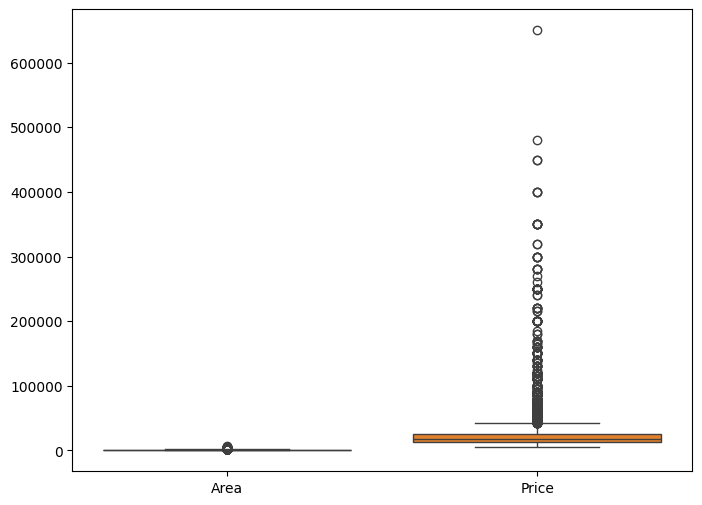

In [354]:
plt.figure(figsize=(8,6))
sns.boxplot(df[['Area','Price']])
plt.show()

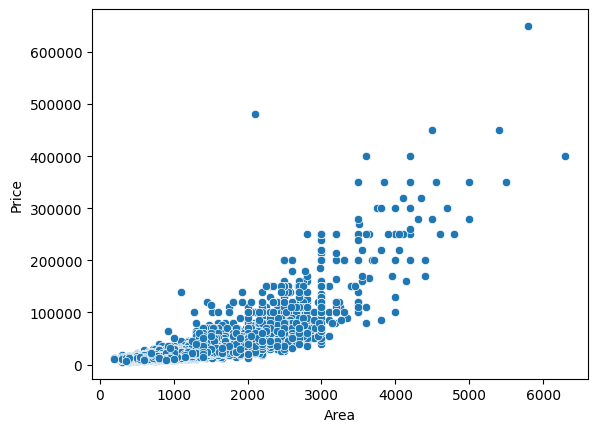

In [355]:
sns.scatterplot(x="Area", y="Price", data=df)
plt.show()


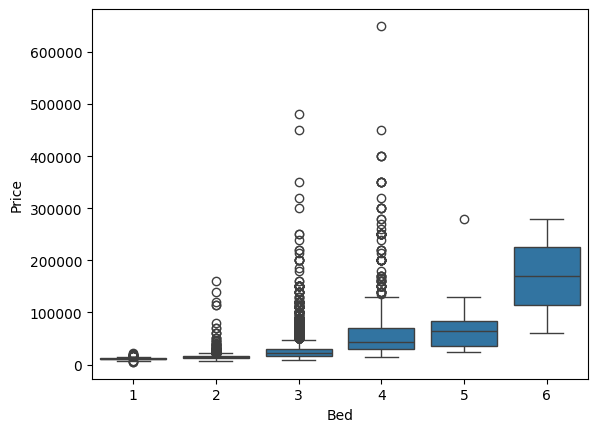

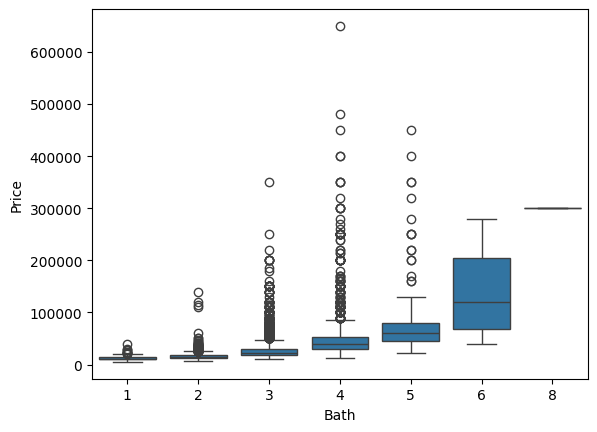

In [356]:
sns.boxplot(x="Bed", y="Price", data=df)
plt.show()

sns.boxplot(x="Bath", y="Price", data=df)
plt.show()


In [357]:
top_lpcations = df["Location"].value_counts().head(20).index
df['Location'] = df['Location'].apply(lambda x: x if x in top_lpcations else 'Other')
df = pd.get_dummies(df, drop_first=True)

In [358]:
Q1=df["Price"].quantile(.25)
Q3=df["Price"].quantile(.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 * IQR
df=df[(df["Price"]>=lower_bound) & (df["Price"]<=upper_bound)]

In [359]:
Q1=df['Bed'].quantile(.25)
Q3=df['Bed'].quantile(.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 * IQR
df=df[(df['Bed']>=lower_bound) & (df['Bed']<=upper_bound)]

In [360]:
Q1=df['Bath'].quantile(.25)
Q3=df['Bath'].quantile(.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 * IQR
df=df[(df['Bath']>=lower_bound) & (df['Bath']<=upper_bound)]

In [361]:
x=df.drop('Price',axis=1)
y=df['Price']

In [362]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [363]:
scale=StandardScaler()
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [364]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [365]:
y_prad=model.predict(x_test_scaled)

In [366]:
y_prad

array([18992.08299708, 20219.87020204, 15258.23665513, ...,
       16744.19937311, 31362.78911318, 12063.19183586])

In [367]:
mae=mean_absolute_error(y_test,y_prad)
mse=mean_squared_error(y_test,y_prad)
rmse=np.sqrt(mse)


In [368]:
r2=r2_score(y_test,y_prad)

In [369]:
mae

3053.4772803736246

In [370]:
mse

16548485.856089797

In [371]:
rmse

np.float64(4067.9830206245697)

In [372]:
r2

0.6813902083603502

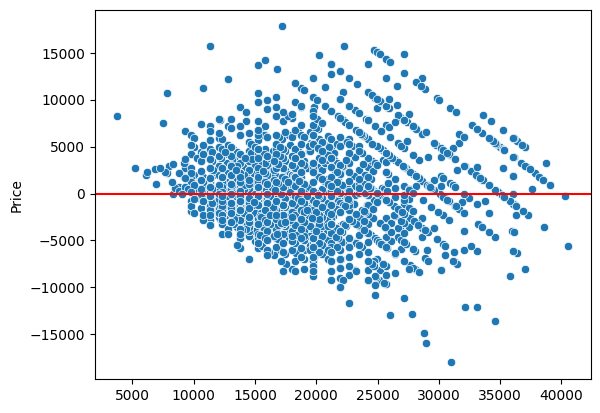

In [373]:
sns.scatterplot(x=y_prad, y=y_test - y_prad)
plt.axhline(0, color='red')
plt.show()


In [374]:
model=RandomForestRegressor()
model.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [375]:
y_prad=model.predict(x_test_scaled)

In [378]:
print("MAE:", mean_absolute_error(y_test, y_prad))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_prad)))
print("R2:", r2_score(y_test, y_prad))

MAE: 3091.116975170766
RMSE: 4176.414601022535
R2: 0.6641788331452152


In [379]:
model=DecisionTreeRegressor()
model.fit(x_train_scaled,y_train)

DecisionTreeRegressor()

In [380]:
print("MAE:", mean_absolute_error(y_test, y_prad))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_prad)))
print("R2:", r2_score(y_test, y_prad))

MAE: 3091.116975170766
RMSE: 4176.414601022535
R2: 0.6641788331452152
